In [64]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf 
from statsmodels.tsa.arima_model import ARIMA
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 15,6
import warnings
warnings.filterwarnings ('ignore')

In [15]:
data = pd.read_csv('AirPassengers.csv')

In [16]:
data.Month = data['Month'].apply(lambda x: dt(int(x[:4]),int(x[5:]),15))

In [17]:
data.Month

0     1949-01-15
1     1949-02-15
2     1949-03-15
3     1949-04-15
4     1949-05-15
         ...    
139   1960-08-15
140   1960-09-15
141   1960-10-15
142   1960-11-15
143   1960-12-15
Name: Month, Length: 144, dtype: datetime64[ns]

In [20]:
data.set_index('Month' , inplace=True)

In [22]:
data.head()

,#Passengers
Month,
1949-01-15,112
1949-02-15,118
1949-03-15,132
1949-04-15,129
1949-05-15,121


In [29]:
data.columns=['Passengers']

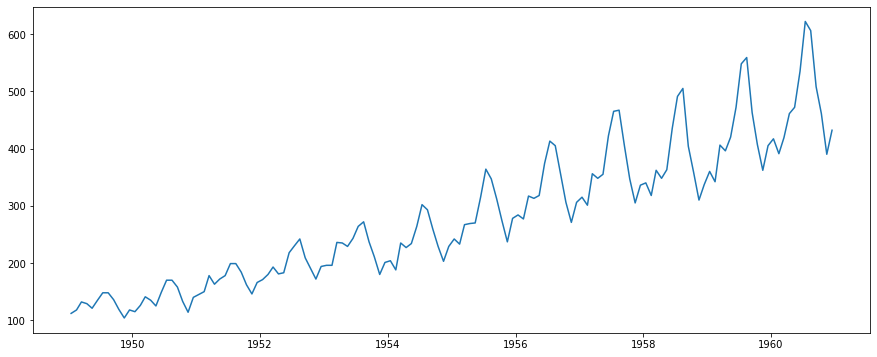

In [30]:
plt.plot(data)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

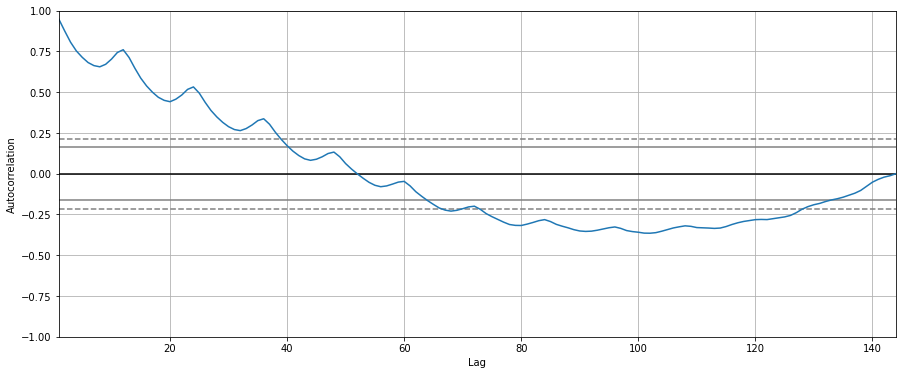

In [65]:
autocorrelation_plot(data)

In [32]:
ts = data

In [39]:
ts.Passengers

,Passengers
Month,
1949-01-15,112
1949-02-15,118
1949-03-15,132
1949-04-15,129
1949-05-15,121
...,...
1960-08-15,606
1960-09-15,508
1960-10-15,461


In [34]:
ts_log = np.log(ts)

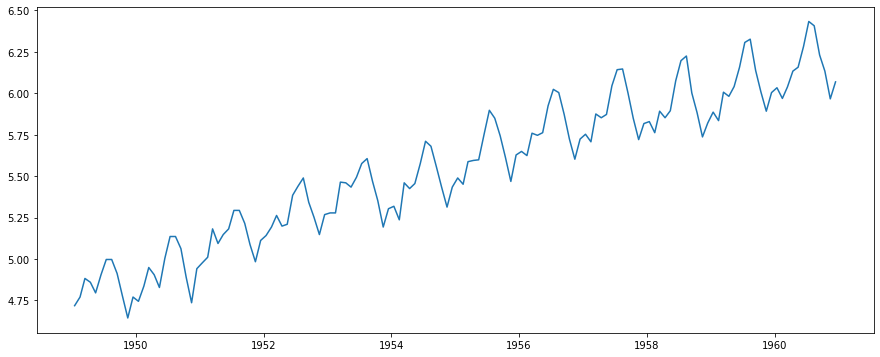

In [35]:
plt.plot()

In [59]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window =30, center = False).mean()
    rolstd  = timeseries.rolling(window =30, center = False).std()
    
    orig = plt.plot(timeseries, color= 'blue' , label = 'Original')
    mean = plt.plot(rolmean, color= 'red' , label = 'Rolling Mean')
    std = plt.plot(rolstd, color= 'black' , label = 'Rolling STD')
    plt.legend(loc='best')
    plt.title('Rolling mean and Rolling Standard Deviation')
    plt.show(block=False)
    
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag='BIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics','p_value','#lags Used','number of Observation used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)
        

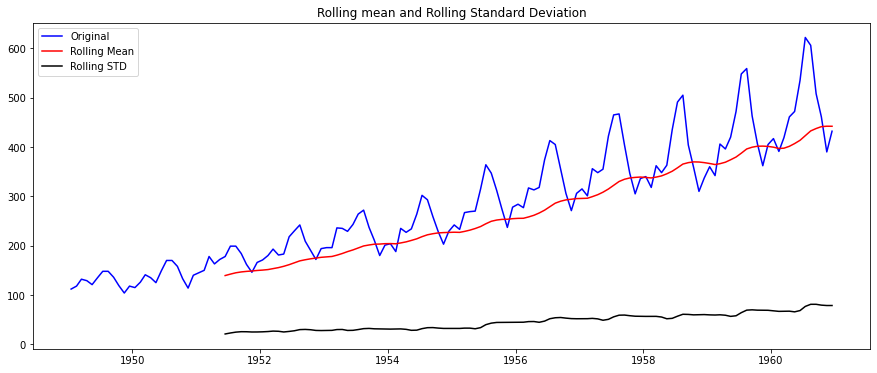

Results of Dickey-Fuller Test:
Test Statistics                 0.815369
p_value                         0.991880
#lags Used                     13.000000
number of Observation used    130.000000
Critical Value (1%)            -3.481682
Critical Value (5%)            -2.884042
Critical Value (10%)           -2.578770
dtype: float64


In [60]:
test_stationarity(ts)

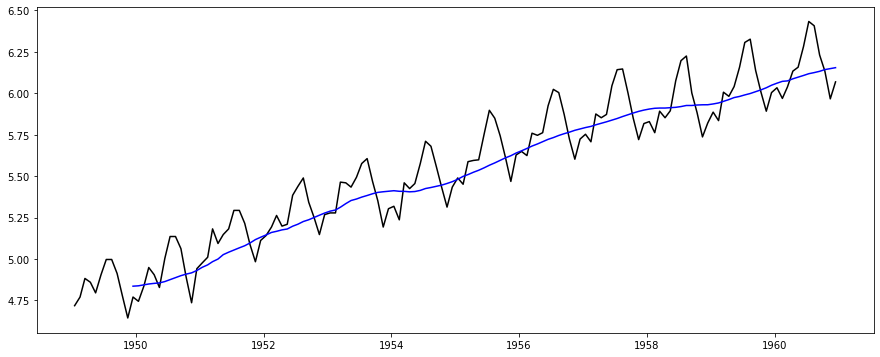

In [72]:
movingAverage = ts_log.rolling(window=12).mean()
movingSTD = ts_log.rolling(window=12).std()
plt.plot(ts_log , color='black')
plt.plot(movingAverage, color='blue')
#plt.plot(movingSTD, color='red')

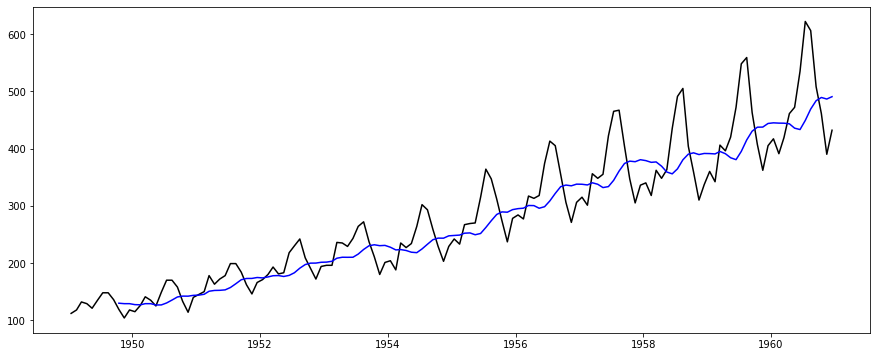

In [98]:
movingAverage_original = ts.rolling(window=10).mean()
movingSTD_original = ts.rolling(window=10).std()
plt.plot(ts, color='black')
plt.plot(movingAverage_original, color='blue')
#plt.plot(movingSTD_original, color='red')

In [99]:
ts_log_mv_diff = ts_log - movingAverage

In [100]:
ts_log_mv_diff.dropna( inplace=True)

In [101]:
ts_Original_mv_diff = ts - movingAverage_original

In [102]:
ts_Original_mv_diff.dropna( inplace=True)

In [103]:
ts_log_mv_diff.head()

,Passengers
Month,
1949-12-15,-0.065494
1950-01-15,-0.093449
1950-02-15,-0.007566
1950-03-15,0.099416
1950-04-15,0.052142


In [104]:
ts_Original_mv_diff.head()

,Passengers
Month,
1949-10-15,-10.8
1949-11-15,-25.0
1949-12-15,-11.0
1950-01-15,-12.3
1950-02-15,-1.0


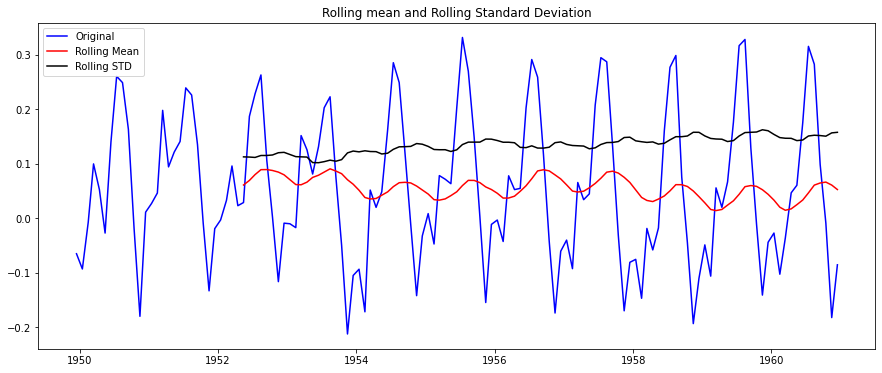

Results of Dickey-Fuller Test:
Test Statistics                -3.162908
p_value                         0.022235
#lags Used                     13.000000
number of Observation used    119.000000
Critical Value (1%)            -3.486535
Critical Value (5%)            -2.886151
Critical Value (10%)           -2.579896
dtype: float64


In [105]:
test_stationarity(ts_log_mv_diff)

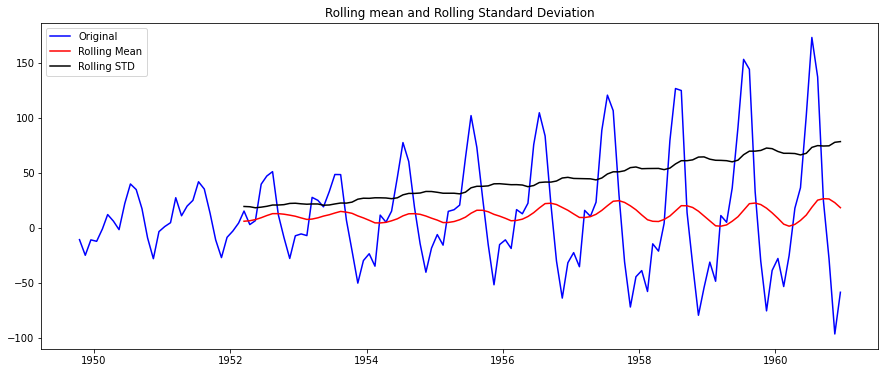

Results of Dickey-Fuller Test:
Test Statistics                -3.309350
p_value                         0.014466
#lags Used                     13.000000
number of Observation used    121.000000
Critical Value (1%)            -3.485585
Critical Value (5%)            -2.885739
Critical Value (10%)           -2.579676
dtype: float64


In [106]:
test_stationarity(ts_Original_mv_diff)